# DR7 Visualizations

Visualize the DR7 maps and voids from voidfinder.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import mpl_toolkits.axisartist.floating_axes as floating_axes

import healpy as hp
from astropy.io import ascii
from astropy import constants as const

mpl.rc('font', size=14)

## DR7 Catalog

Load data from file.

In [2]:
data = ascii.read('../../python/voidfinder/data/vollim_dr7_cbp_102709.dat',
                  names=['ra', 'dec', 'z', 'Rgal', 'mr_abs'])

ra, dec, z, Rgal, mr_abs = data['ra'], data['dec'], data['z'], data['Rgal'], data['mr_abs']

### Plot Catalog Angular Distribution

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


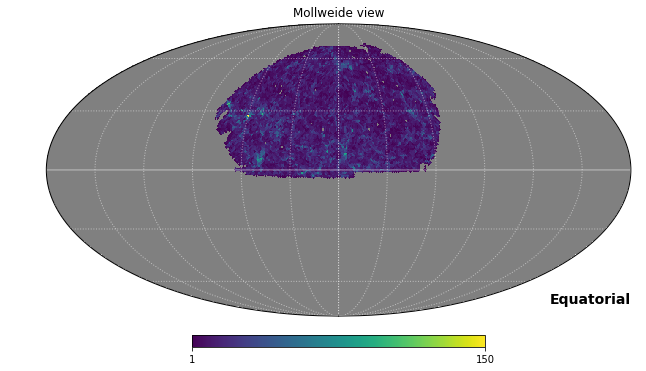

In [3]:
degree = np.pi / 180
nside = 64
npix = hp.nside2npix(nside)

th = (90. - dec)*degree
ph = ra*degree
indices = hp.ang2pix(nside, th, ph)
idx, counts = np.unique(indices, return_counts=True)

angmap = np.zeros(npix, dtype=float) + hp.UNSEEN
angmap[idx] = counts

# hp.orthview(angmap, coord='C', half_sky=True, rot=180)
hp.mollview(angmap, coord='C', flip='astro', rot=180)
hp.graticule(coord='C', color='white', alpha=0.5)

### Plot Declination Slices

Plot catalog distribution in $1^\circ$ declination slices (wedge plots).

In [4]:
c = const.c.to('km/s').value

In [5]:
def setup_axes3(fig, rect, ra0, ra1, cz0, cz1):
    """Produce a polar "wedge plot" for a slice of the catalog.
    
    :param fig: `pyplot.figure` object.
    :param rect: multi-axis coordinate, e.g., 111, 22[1-4], etc.
    :param ra0: minimum RA.
    :param ra0: maximum RA.
    :param cz0: minimal radial coordinate (e.g., v=cz).
    :param cz1: maximal radial coordinate (e.g., v=cz).
    """
    tr = mpl.projections.PolarAxes.PolarTransform() 
    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(ra0, ra1, cz0, cz1))

    ax1 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)
    fig.add_subplot(ax1)

    # adjust axis
    ax1.axis['left'].set_axis_direction('bottom')
    ax1.axis['right'].set_axis_direction('top')
    ax1.axis['bottom'].set_visible(False)
    ax1.axis['top'].set_axis_direction("bottom")
    ax1.axis['top'].toggle(ticklabels=True, label=True)
    ax1.axis['top'].major_ticklabels.set_axis_direction("top")
    ax1.axis['top'].label.set_axis_direction("top")
    ax1.axis['left'].label.set_text(r'$z$ [km s$^{-1}$]')
    ax1.axis['left'].major_ticklabels.set_axis_direction('right')
    ax1.axis["top"].label.set_text(r'$\alpha-90^\circ$')

    # create a parasite axes whose transData in RA, cz
    aux_ax = ax1.get_aux_axes(tr)

    aux_ax.patch = ax1.patch  
    ax1.patch.zorder = 0.9  

    return ax1, aux_ax

19.998665000000003 170.99197400000003
0.0 32077.793005999996


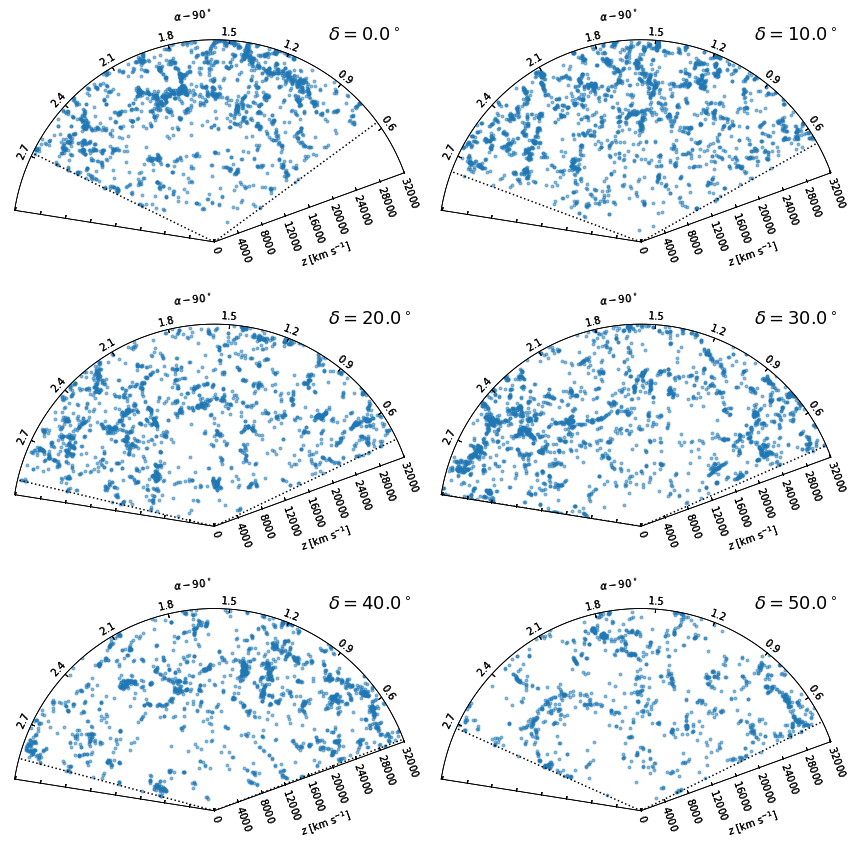

In [6]:
fig = plt.figure(figsize=(12,12))

ra0, ra1 = np.min(ph)-0.5*np.pi, np.max(ph)-0.5*np.pi
print(ra0/degree, ra1/degree)
cz0, cz1 = 0., np.max(c*z)
print(cz0, cz1)

for i, d in enumerate([0., 10., 20., 30., 40., 50.]):
    cut = np.logical_and(dec > d, dec <= d+1)
    this_ra0, this_ra1 = np.min(ph[cut])-0.5*np.pi, np.max(ph[cut])-0.5*np.pi
    rect = 320 + (i+1)
    ax, aux_ax = setup_axes3(fig, rect, ra0, ra1, 0, cz1)
    aux_ax.scatter(ph[cut]-0.5*np.pi, c*z[cut], marker='.', alpha=0.5)
    aux_ax.plot([this_ra0, this_ra1], [cz0, cz1], color='k', ls=':')
    aux_ax.plot([this_ra1, this_ra0], [cz0, cz1], color='k', ls=':')
    ax.text(18000,32000, r'$\delta={:.1f}^\circ$'.format(d), fontsize=18)

fig.tight_layout()